In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

#from markov_device import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import plotnine 
import glob

## Load Simulation Data

In [2]:
def load_simulation(dir_name='../data/simulation_m0', model_name='markov-model1'):
    
    df1_state1stay=pd.read_csv(glob.glob('%s/%s-state1stay*.csv' % (dir_name, model_name))[0], index_col=0, header=0, low_memory=False)
    df1_state1stay=df1_state1stay.loc[df1_state1stay['received_reward']!='received_reward']
    df1_state1stay['epoch'] = pd.to_numeric(df1_state1stay['epoch'], errors='coerce')
    df1_state1stay['received_reward'] = pd.to_numeric(df1_state1stay['received_reward'], errors='coerce')
    df1_state1stay['state1_stay'] = pd.to_numeric(df1_state1stay['state1_stay'], errors='coerce')
    
#     if model_name=='markov-model3':
        
#         df1_state1stay.index = range(len(df1_state1stay))
#         df1_state1stay_new = df1_state1stay.drop(list(range(100, 200)) + list(range(500000, 500200)), axis=0)
#         df11_state1stay = df1_state1stay_new.loc[:500000]
#         df12_state1stay = df1_state1stay_new.loc[500000:]

    df1 = pd.read_csv(glob.glob('%s/%s-beh*.csv' % (dir_name, model_name))[0], index_col=0, header=0, low_memory=False)
    df1=df1.loc[df1['received_reward']!='received_reward']
    df1['index_bin'] = pd.to_numeric(df1['index_bin'], errors='coerce')
    df1['received_reward'] = pd.to_numeric(df1['received_reward'], errors='coerce')
    df1['optimal_response_sum_prop'] = pd.to_numeric(df1['optimal_response_sum_prop'], errors='coerce')
    df1['received_reward_sum_prop'] = pd.to_numeric(df1['received_reward_sum_prop'], errors='coerce')
    df1['state1_response_time'] = pd.to_numeric(df1['state1_response_time'], errors='coerce')
    df1['state2_response_time'] = pd.to_numeric(df1['state2_response_time'], errors='coerce')
    
#     if model_name=='markov-model3':
#         df1.index = range(len(df1)) 
#         df1_new = df1.drop(list(range(100, 200)) + list(range(500000, 500200)), axis=0)

#         df11 = df1_new.loc[:500000]
#         df12 = df1_new.loc[500000:]
#         return df11,df12, df11_state1stay, df12_state1stay
    
    
    return df1, df1_state1stay

In [3]:
model1 = "markov-model1"
model2 = "markov-model2"
model3 = "markov-model3"
# df1, df2, df3 = try_simulation_example()
df1, df1_state1stay = load_simulation(dir_name='../data/test/m1', model_name='markov-model1')
df2, df2_state1stay = load_simulation(dir_name='../data/test/m2', model_name='markov-model2')
df31, df31_state1stay = load_simulation(dir_name='../data/test/m31', model_name='markov-model3')
df32, df32_state1stay = load_simulation(dir_name='../data/test/m32', model_name='markov-model3')

In [14]:
df1_aggregate = df1_state1stay.groupby(['epoch', 'received_reward', 'state_frequency']).agg(state1_stay_mean=('state1_stay', 'mean'),
                                                                                        state1_stay_sd=('state1_stay', 'std'),
                                                                                        state1_stay_se=('state1_stay', 'sem')).reset_index()
df1_aggregate.head()

,epoch,received_reward,state_frequency,state1_stay_mean,state1_stay_sd,state1_stay_se
0,0,0,common,0.461538,0.518875,0.143910
1,0,0,rare,0.500000,0.516398,0.129099
2,0,2,common,0.769231,0.438529,0.121626
3,0,2,rare,0.714286,0.487950,0.184428
4,1,0,common,0.153846,0.375534,0.104154


## Stay Probability

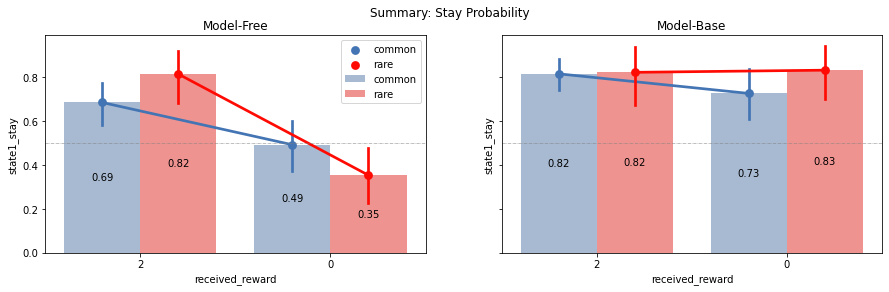

In [5]:
# Create an array with the colors you want to use
my_palette = sns.color_palette(["#4374B3", "#FF0B04"])

fig, axes = plt.subplots(1,2, figsize=(15,4), sharex=True, sharey=True)
fig.suptitle('Summary: Stay Probability')
sns.barplot(data=df1_state1stay, x='received_reward', y='state1_stay', 
            hue='state_frequency', 
            palette=my_palette, alpha=.5, 
            order = sorted(df1_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[0]) 
sns.pointplot(data=df1_state1stay, x='received_reward', y='state1_stay', dodge=0.4,
            hue='state_frequency', 
              palette=my_palette, 
            order = sorted(df1_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[0]) 

sns.barplot(data=df2_state1stay, x='received_reward', y='state1_stay',
            hue='state_frequency', palette=my_palette, alpha=.5,
            order = sorted(df2_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[1]) 
sns.pointplot(data=df2_state1stay, x='received_reward', y='state1_stay',  dodge=0.4,
            hue='state_frequency', 
            palette=my_palette, 
            order = sorted(df2_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[1])  

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    ax.axhline(0.5, color='grey', ls='-.', linewidth=.5)    

    

axes[0].legend(loc=1)
axes[1].legend_.remove()
axes[0].set_title('Model-Free')
axes[1].set_title('Model-Base')

plt.show()

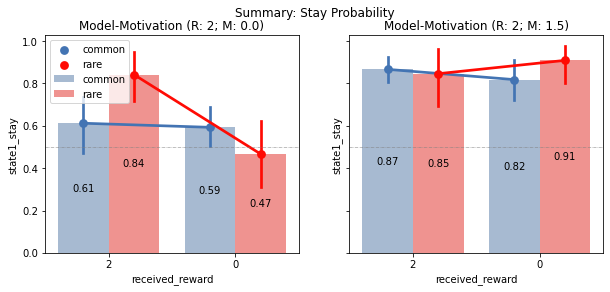

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
fig.suptitle('Summary: Stay Probability')
sns.barplot(data=df31_state1stay, x='received_reward', y='state1_stay',
            hue='state_frequency', palette=my_palette, alpha=.5,
            order = sorted(df31_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[0]) 
sns.pointplot(data=df31_state1stay, x='received_reward', y='state1_stay',  dodge=0.4,
            hue='state_frequency', 
            palette=my_palette, 
            order = sorted(df31_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[0]) 

sns.barplot(data=df32_state1stay, x='received_reward', y='state1_stay',
            hue='state_frequency', palette=my_palette, alpha=.5,
            order = sorted(df32_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[1]) 
sns.pointplot(data=df32_state1stay, x='received_reward', y='state1_stay',  dodge=0.4,
            hue='state_frequency', 
            palette=my_palette, 
            order = sorted(df32_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[1]) 

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    ax.axhline(0.5, color='grey', ls='-.', linewidth=.5)    

axes[0].legend(loc=2)
axes[1].legend_.remove() 
axes[0].set_title('Model-Motivation (R: %.d; M: %.1f)' % (df31['received_reward'].max(), df31['other_parameters'].max()))
axes[1].set_title('Model-Motivation (R: %.d; M: %.1f)' % (df32['received_reward'].max(), df32['other_parameters'].max()))

plt.show()


## Response Time

In [7]:
df1_long = df1[['received_reward', 'state_frequency', 'state1_response_time', 'state2_response_time']].melt(id_vars=['received_reward', 'state_frequency'], value_vars=['state1_response_time', 'state2_response_time'], var_name='state_name', value_name='response_time')
df2_long = df2[['received_reward', 'state_frequency', 'state1_response_time', 'state2_response_time']].melt(id_vars=['received_reward', 'state_frequency'], value_vars=['state1_response_time', 'state2_response_time'], var_name='state_name', value_name='response_time')
df31_long = df31[['received_reward', 'state_frequency', 'state1_response_time', 'state2_response_time']].melt(id_vars=['received_reward', 'state_frequency'], value_vars=['state1_response_time', 'state2_response_time'], var_name='state_name', value_name='response_time')
df32_long = df32[['received_reward', 'state_frequency', 'state1_response_time', 'state2_response_time']].melt(id_vars=['received_reward', 'state_frequency'], value_vars=['state1_response_time', 'state2_response_time'], var_name='state_name', value_name='response_time')


df1_long['state'] = df1_long.apply(lambda x: x['state_name'].split('_')[0]+':'+x['state_frequency'], axis=1)
df2_long['state'] = df2_long.apply(lambda x: x['state_name'].split('_')[0]+':'+x['state_frequency'], axis=1)
df31_long['state'] = df31_long.apply(lambda x: x['state_name'].split('_')[0]+':'+x['state_frequency'], axis=1)
df32_long['state'] = df32_long.apply(lambda x: x['state_name'].split('_')[0]+':'+x['state_frequency'], axis=1)

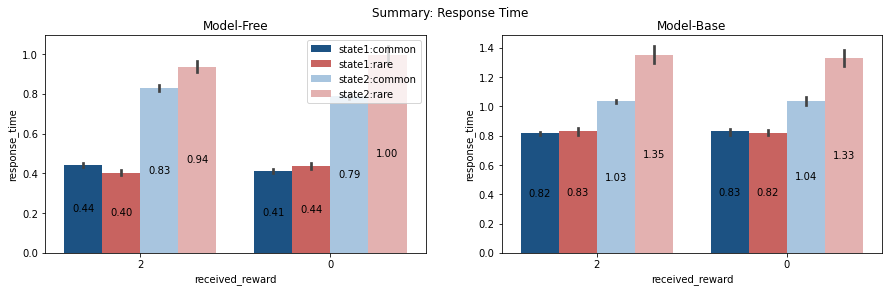

In [8]:
my_palette2 = sns.color_palette(["#0b5394", "#D9534F", "#9fc5e8", "#ECA9A7"])
hue_order = ['state1:common', 'state1:rare', 'state2:common', 'state2:rare']

fig, axes = plt.subplots(1,2, figsize=(15,4), sharex=True)
fig.suptitle('Summary: Response Time')
sns.barplot(data=df1_long, x='received_reward', y='response_time', 
            hue='state', palette=my_palette2,
            order = sorted(df1_long['received_reward'].unique(), reverse=True), 
            hue_order=hue_order, ax=axes[0]) 

sns.barplot(data=df2_long, x='received_reward', y='response_time',
            hue='state', palette=my_palette2,  
            order = sorted(df2_long['received_reward'].unique(), reverse=True), 
            hue_order=hue_order, ax=axes[1]) 
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')    

axes[0].legend(loc=1)
axes[1].legend_.remove()
axes[0].set_title('Model-Free')
axes[1].set_title('Model-Base')

plt.show()

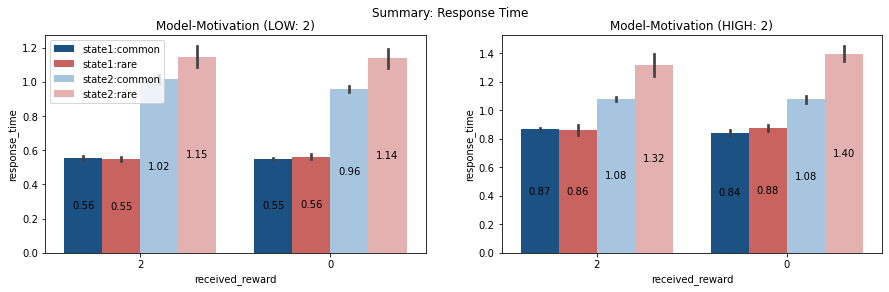

In [9]:
fig, axes = plt.subplots(1,2, figsize=(15,4), sharex=True)
fig.suptitle('Summary: Response Time')
sns.barplot(data=df31_long, x='received_reward', y='response_time', 
            hue='state', palette=my_palette2,
            order = sorted(df31_long['received_reward'].unique(), reverse=True), 
            hue_order=hue_order, ax=axes[0]) 

sns.barplot(data=df32_long, x='received_reward', y='response_time',
            hue='state', palette=my_palette2,  
            order = sorted(df32_long['received_reward'].unique(), reverse=True), 
            hue_order=hue_order, ax=axes[1]) 
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')    

axes[0].legend(loc=2)
axes[1].legend_.remove() 
axes[0].set_title('Model-Motivation (LOW: %.d)' % (df31['received_reward'].max()))
axes[1].set_title('Model-Motivation (HIGH: %.d)' % (df32['received_reward'].max()))

plt.show()